In [128]:
from ultralytics import YOLO

# Initialize a YOLO-World model
model = YOLO("../../model/yolov8s-world.pt")  # or select yolov8m/l-world.pt

# Define custom classes
model.set_classes(["yellow clamp", "tool", "bottle", "tape measure", "stapler", "blue stapler", "black robotic arm", "pen", "scissor", "mouse", "charger", "black tape", "keyboard", "blue box"])

# Save the model with the defined offline vocabulary
model.save("../../model/custom_yolov8s_world_1.pt")


In [129]:

# Load your custom model
model = YOLO("../../model/custom_yolov8s_world_1.pt")


In [130]:
image_path="/home/fyp/Pictures/TestSeg/clamp_blue_box.jpg"
# image_path="/home/fyp/Pictures/TestSeg/bottle_tape.jpg"
# Execute prediction for specified categories on an image
results = model.predict(image_path)


image 1/1 /home/fyp/Pictures/TestSeg/clamp_blue_box.jpg: 480x640 2 blue boxs, 3.9ms
Speed: 0.8ms preprocess, 3.9ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


In [131]:
# results = model(image_path)  # predict on an image

# Access the results
for result in results:
    xywh = result.boxes.xywh  # center-x, center-y, width, height
    xywhn = result.boxes.xywhn  # normalized
    xyxy = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
    xyxyn = result.boxes.xyxyn  # normalized
    names = [result.names[cls.item()] for cls in result.boxes.cls.int()]  # class name of each box
    confs = result.boxes.conf  # confidence score of each box
    print(1)
print(type(results))
print(len(results))
print(results[0].names)


1
<class 'list'>
1
{0: 'yellow clamp', 1: 'tool', 2: 'bottle', 3: 'tape measure', 4: 'stapler', 5: 'blue stapler', 6: 'black robotic arm', 7: 'pen', 8: 'scissor', 9: 'mouse', 10: 'charger', 11: 'black tape', 12: 'keyboard', 13: 'blue box'}


In [132]:
print(names)
print(xywh)

['blue box', 'blue box']
tensor([[1119.0630,  306.6307,  173.7351,  157.6952],
        [ 669.4930,  311.2312,  123.8379,  144.5757]], device='cuda:0')


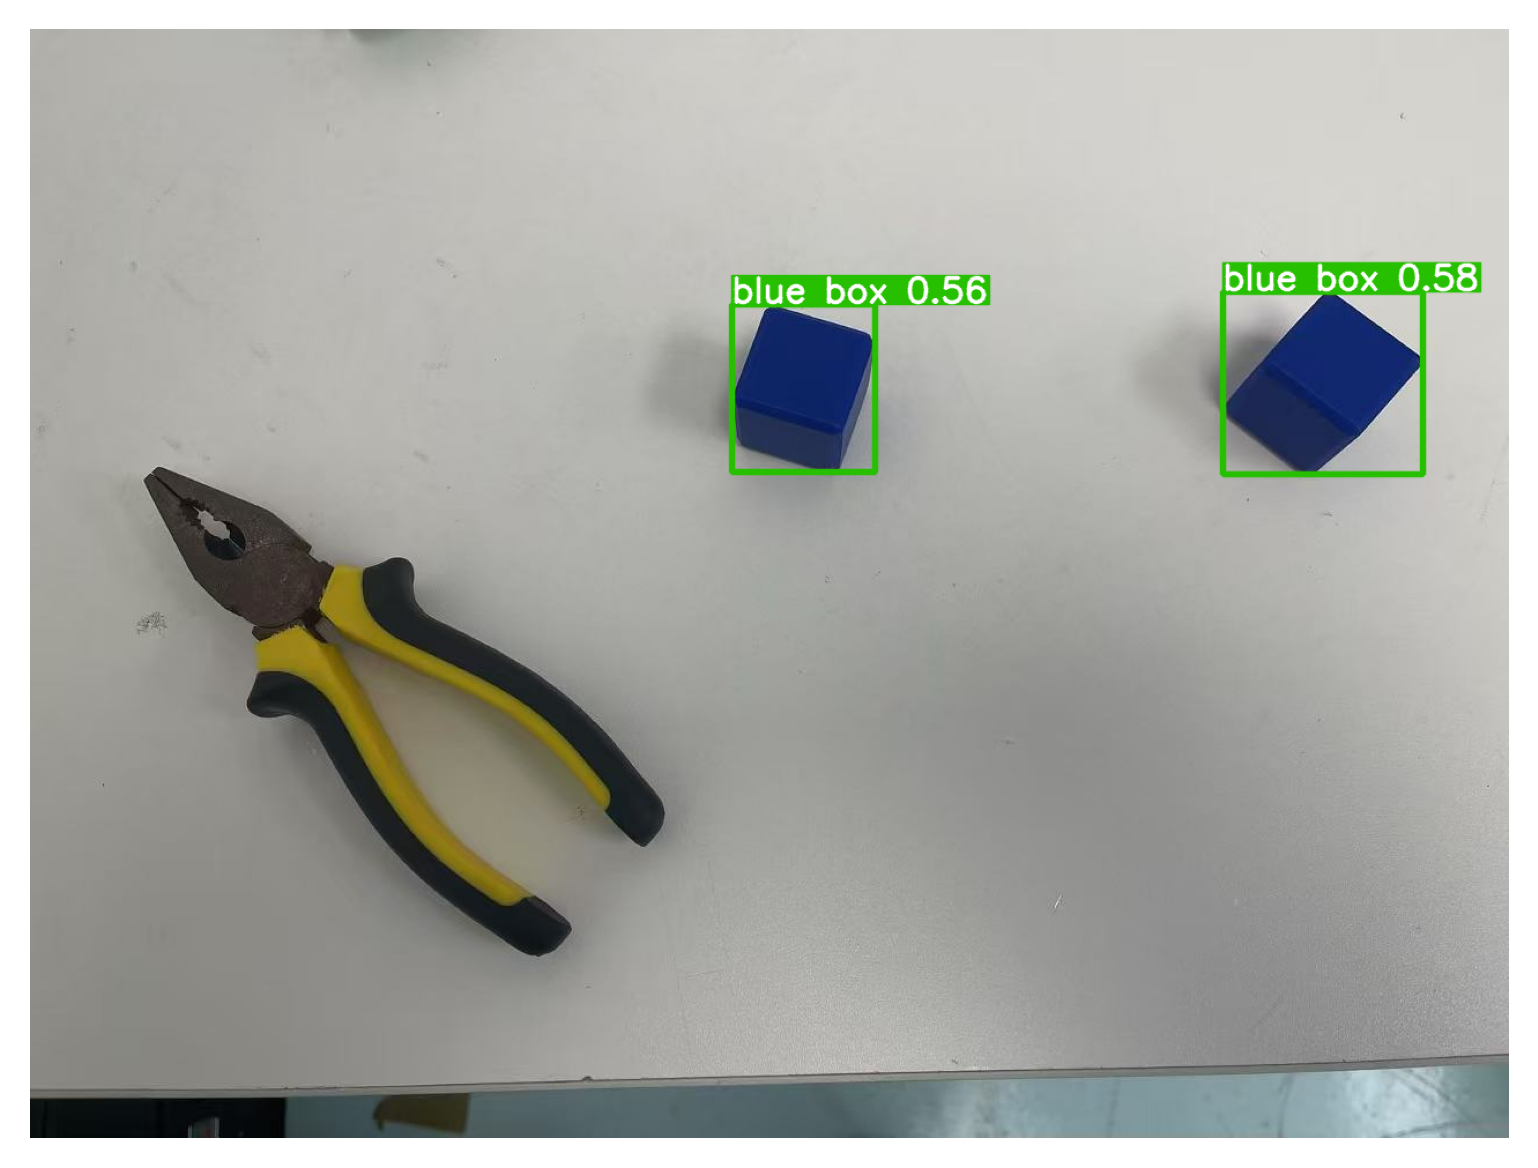

Image width: 1280, Image height: 960


In [133]:
# Import necessary libraries
import matplotlib.pyplot as plt
from PIL import Image

# Draw the results on the image
annotated_image = results[0].plot()

# Convert the image to a format suitable for Matplotlib
annotated_image = Image.fromarray(annotated_image[..., ::-1])

# Display the image in the Jupyter Notebook
plt.rcParams['figure.dpi'] = 300
plt.imshow(annotated_image)
plt.axis('off')
plt.show()
# Print the size of the annotated image
width, height = annotated_image.size
print(f"Image width: {width}, Image height: {height}")


In [9]:
xywh

tensor([[2285.0156, 1358.0132,  631.8397,  772.0001],
        [ 789.8627,  680.4965, 1576.8600, 1353.5319],
        [1902.7991,  189.9008,  664.1499,  379.8017]], device='cuda:0')

In [6]:
xywh.cpu().detach().numpy().tolist()

[[1169.9774169921875, 2018.0146484375, 490.12017822265625, 676.6168212890625],
 [2117.96826171875, 1021.9503173828125, 2246.8681640625, 1098.0595703125]]